In [174]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

In [132]:
# load iris dataset 
iris = datasets.load_iris()
# Labels: 
# 0: Setosa 
# 1: Versicolor
# 2: Virginica 
# Features: 
# Sepal length, Sepal width, Petal length, Petal width

# Inputs 
X = iris.data
Y = iris.target
# Standardized training features 
standardizedX = preprocessing.scale(X)

In [214]:
# Square-loss linear classifier with gradient descent 
'''
clf = linear_model.SGDClassifier(\
            loss='squared_loss', penalty='none',\
            max_iter=10000, tol=None, shuffle=True,\
        )
'''

# Square-loss linear classifier with L1 regularization 
'''
clf = linear_model.SGDClassifier(\
            loss='squared_loss', penalty='l1',\
            max_iter=10000, tol=None, shuffle=True,\
        )
'''
# Vary penalty (alpha):
# 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10.0

# Square-loss linear classifier with L2 regularization
'''
clf = linear_model.SGDClassifier(\
            loss='squared_loss', penalty='l2',\
            max_iter=10000, tol=None, shuffle=True,\
        )
'''
# Vary penalty (alpha):
# 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10.0

# Huber-Loss Linear Classifier 
'''
clf = linear_model.SGDClassifier(\
            loss='huber', penalty='none',\
            max_iter=10000, tol=None, shuffle=True,\
        )
'''
# Vary epsilon:
# 1.0, 2.0, 5.0, 10.0, 50.0, 100.0

"\nclf = linear_model.SGDClassifier(            loss='huber', penalty='none',            max_iter=10000, tol=None, shuffle=True,        )\n"

In [192]:
# Set up cross validator 
cv = ShuffleSplit(\
        n_splits=10, test_size=0.25\
    )

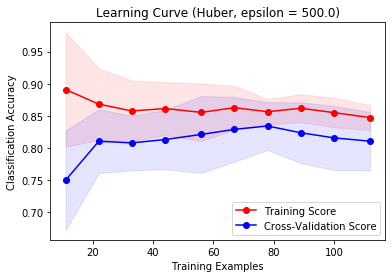

In [194]:
# Generate learning curves
trainSize, trainScore, testScore = \
    learning_curve(\
        clf, standardizedX, Y,\
        train_sizes=np.linspace(0.1, 1.0, 10),\
        cv=cv,\
        scoring="accuracy"
    )
# Calculate score metrics 
trainScoreMean = np.mean(trainScore, axis=1)
trainScoreStd = np.std(trainScore, axis=1)
testScoreMean = np.mean(testScore, axis=1)
testScoreStd = np.std(testScore, axis=1)
plt.figure()
plt.fill_between(trainSize, trainScoreMean - trainScoreStd,\
        trainScoreMean + trainScoreStd, alpha=0.1, color='r'\
    )
plt.fill_between(trainSize, testScoreMean - testScoreStd,\
        testScoreMean + testScoreStd, alpha=0.1, color='b'\
    )
plt.plot(trainSize, trainScoreMean, 'o-', color='r',\
        label="Training Score")
plt.plot(trainSize, testScoreMean, 'o-', color='b',\
        label="Cross-Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Classification Accuracy")
plt.title("Learning Curve (Huber, epsilon = " + str(epsilon) + ")")
plt.legend(loc='lower right')

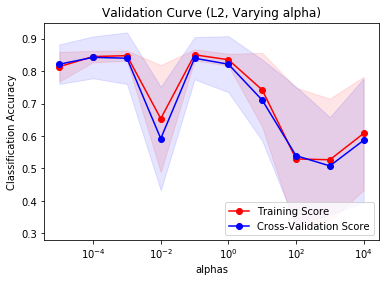

In [217]:
# Generate validation curves 
alphas = np.logspace(-5,4,10)
#epsilons = np.linspace(1.0,100.0,10)
trainScore, testScore = validation_curve(\
        clf, standardizedX, Y, param_name="alpha",
        param_range=alphas, cv=cv
  )

trainScoreMean = np.mean(trainScore, axis=1)
trainScoreStd = np.std(trainScore, axis=1)
testScoreMean = np.mean(testScore, axis=1)
testScoreStd = np.std(testScore, axis=1)
plt.figure()

plt.fill_between(alphas, trainScoreMean - trainScoreStd,\
        trainScoreMean + trainScoreStd, alpha=0.1, color='r'\
    )
plt.fill_between(alphas, testScoreMean - testScoreStd,\
        testScoreMean + testScoreStd, alpha=0.1, color='b'\
    )
plt.semilogx(alphas, trainScoreMean, 'o-', color='r',\
        label="Training Score")
plt.semilogx(alphas, testScoreMean, 'o-', color='b',\
        label="Cross-Validation Score")
plt.xlabel("alphas")
plt.ylabel("Classification Accuracy")
plt.title("Validation Curve (L2, Varying alpha)")
plt.legend(loc='lower right')

In [322]:
alphas = np.logspace(-2,0,10)
weights = np.zeros((alphas.shape[0],12))
# Plot weights while varying parameters
for i in range(0,alphas.shape[0]):
    clf = linear_model.SGDClassifier(\
                loss='squared_loss', penalty='l2',\
                max_iter=10000, tol=None, shuffle=True,\
                alpha=alphas[i]
            )
    # Split dataset 
    trainX, testX, trainY, testY = train_test_split(\
        standardizedX, Y, test_size=0.25)
    clf.fit(trainX, trainY)
    # Weights of model
    weights[i,:] = clf.coef_.flatten()
    print(clf.score(testX, testY))
    print(clf.coef_)

0.631578947368421
[[-2.03437375  1.12966126  5.98542855 -4.64564423]
 [ 2.57320684 -1.50636025 -7.47695814  4.83939979]
 [-3.01413402  1.45299003  9.33271094 -5.46781342]]
0.4473684210526316
[[  43.27909423  -19.85931861 -127.1042628    78.37106909]
 [  36.2982276   -17.24747456 -105.68260191   65.42591878]
 [ -55.67780371   26.00285691  162.8514128  -100.35517559]]
0.23684210526315788
[[ -3944.48022789   1759.18682942  12367.09206432  -8107.13475308]
 [ -3595.97269878   1603.2288516   11275.52173592  -7391.16771136]
 [  4689.43486297  -2091.10296504 -14703.61810008   9639.04608901]]
0.21052631578947367
[[-1.95355735e-01  3.44308507e-01  1.17675721e-01 -6.44699324e-01]
 [ 2.62645775e+01 -1.41176670e+01 -8.87847948e+01  5.91140176e+01]
 [ 2.30129473e+04 -1.20511487e+04 -7.82340544e+04  5.22232355e+04]]
0.6052631578947368
[[ 4.57318374e-02  2.21986369e-01 -7.30667411e-01 -7.82882966e-02]
 [ 1.26640853e+00 -1.01693576e+00 -3.52270604e+00  2.19912710e+00]
 [-1.65782099e-03  1.78362230e-01 

-7088.290800361887